# Datos y PCA

## 1. Datos

**Tareas del bloque 2 de Sistemas Inteligentes (SIN):**

* **Iris:** $\;C=3\,$ (setosa, versicolor y virgínica), $\,N=150\,$ ($50$ por clase), $\,D=4\,$ (longitud y amplitud de pétalos y sépalos)
* **Digits:** $\;C=10\,$ (dígitos del 0 al 9), $\,N=1797\,$ $\,D=64\,$ grises en $\{0,1,\dotsc,16\}$ de imágenes 8x8
* **Olivetti:** $\;C=40\,$ (persona, de 0 a 39), $\,N=400\,$ (10 por persona), $\,D=4096\,$ grises en $[0,1]$ de imágenes 64x64
* **Openml:** $\;$ repositorio de tareas de clasificación del que destacamos 3 "benchmark suites"
    * **OpenML-CC18 Curated Classification benchmark:** $\;$ sid 99, 72 tareas
    * **Tabular benchmark categorical classification:** $\;$ sid 334, 7 tareas
    * **AutoML Benchmark All Classification:** $\;$ sid 271, 71 tareas

**Ejercicio (para casa):** $\;$ Por cada una de las 153 tareas de SIN (iris, digits, olivetti, 72 OpenML-CC18, 7 Tabular y 71 AutoML), estima el error de regresión logística ajustado mediante sklearn con `clf = LogisticRegression(random_state=23).fit(X_train, y_train)`

<details><summary>Solución:</summary>

iris $0.0\%,\,$ digits $3.1\%,\,$ olivetti $0.0\%,\,$ [openml](https://github.com/josanna2/Bloque2_SIN2324/blob/main/TL_sesiones_de_laboratorio/S3_Regresi%C3%B3n_Log%C3%ADstica/openml.ipynb)

</details>

# 2. Análisis de componentes principales (PCA)

**Ejemplo:** $\;$ $N=4$ datos de $D=2$ dimensiones que queremos reducir a $\,K=1\,$ dimensión

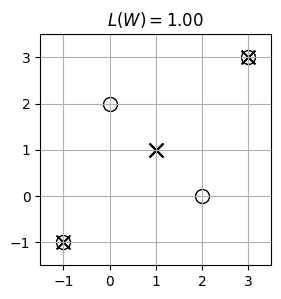

In [ ]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X);
K = 1; _, _, Vt = np.linalg.svd(X - X.mean(0)); W = Vt[:K, :].T; Z = X @ W; hX = Z @ W.T
L = np.square(X - hX).sum(axis=1).mean()
fig, ax = plt.subplots(figsize=(3, 3)); ax.set_aspect("equal")
plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True); ax.set_title(f'$L(W)={L:.2f}$')
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
plt.scatter(*hX.T, facecolor='black', s=100, marker='x');

[**Clase PCA de sklearn:**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* **Parámetros:** $\;$ `n_components` $\,=K,\,$ etc.
* **Atributos:** $\;$ `components_`, `explained_variance_`, `singular_values_`, `mean_`, `n_components`, `n_samples`, etc.
* **Métodos:** $\;$ `fit(X)`, `transform(X)`, `fit_transform(X)`, `inverse_transform(X)`, etc.

**Ejemplo (cont.):** $\;$ con sklearn, `n_components` $\,=K$

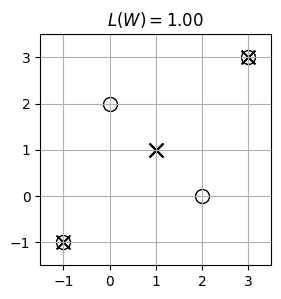

In [ ]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.decomposition import PCA
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X)
K = 1; pca = PCA(n_components=K).fit(X); Z = pca.transform(X)
hX = pca.inverse_transform(Z); L = np.square(X - hX).sum(axis=1).mean()
fig, ax = plt.subplots(figsize=(3, 3)); ax.set_aspect("equal")
plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True); ax.set_title(f'$L(W)={L:.2f}$')
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
plt.scatter(*hX.T, facecolor='black', s=100, marker='x');

## 3. PCA aplicado a imágenes

**Alta dimensionalidad:** $\;$ $D$ suele ser muy elevada con imágenes y puede ocurrir que $\,D\gg N;\;$ por ejemplo, en olivetti, $\,N=400\,$ y $\,D=4096$

**Error de reconstrucción (empírico):** $\;$ decrece monótonamente con $K$ hasta hacerse nulo con $K=\min(N, D)$

**Error de reconstrucción poblacional:** $\;$ podemos separar un test para estimarlo

**Ejemplo:** $\;$ olivetti con un $90\%$ de datos para entrenamiento, $\,N=0.9\cdot 400=360,\,$ PCA aprende el training con $\,K=\min(N, D)=360$

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


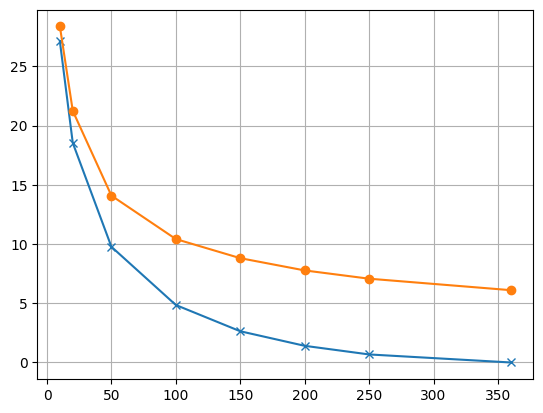

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split #esto es para apartar los datos de test y los de entrenamiento

X, y = fetch_olivetti_faces(return_X_y=True)
test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23) #Random_state es como una semilla para replicidad

max_K = len(X_train)
Ks = np.array([10, 20, 50, 100, 150, 200, 250, max_K]) #esto es las dimensiones

L_train = np.empty_like(Ks, dtype=float)
L_test = np.empty_like(Ks, dtype=float)

for i, K in enumerate(Ks):
    pca = PCA(n_components=K).fit(X_train)
    Z_train = pca.transform(X_train); hX_train = pca.inverse_transform(Z_train)
    L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()

    Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test)
    L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()
plt.grid(True); plt.plot(Ks, L_train, '-x', Ks, L_test, '-o');

**Eigenimages:** $\;$ las componentes principales pueden verse como imágenes base que se combinan linealmente para formar cualquier imagen de la tarea

**Ejemplo (cont.):** $\;$ primeras **eigenfaces** de olivetti; los píxeles relevantes se hallan en las regiones (relativamente) más brillantes

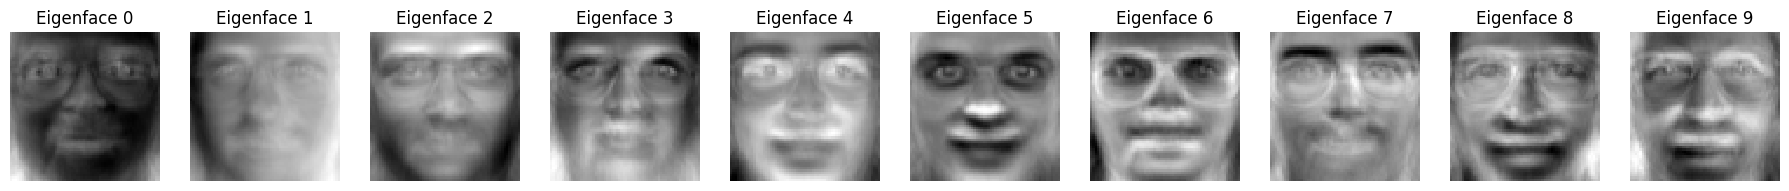

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
X, y = fetch_olivetti_faces(return_X_y=True)

K = 10; pca = PCA(n_components=K).fit(X); nrows, ncols = 1, 10

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"Eigenface {i}")
    ax.imshow(pca.components_[i, :].reshape((64, 64)), cmap=plt.cm.gray, interpolation="none") #pca.components_ = cada una de las filas de mi matriz de proy. hasta k obv

**Visualización de imágenes reconstruidas:** $\;$ la calidad de PCA con el $K$ escogido puede valorarse mediante visualización de imágenes reconstruidas

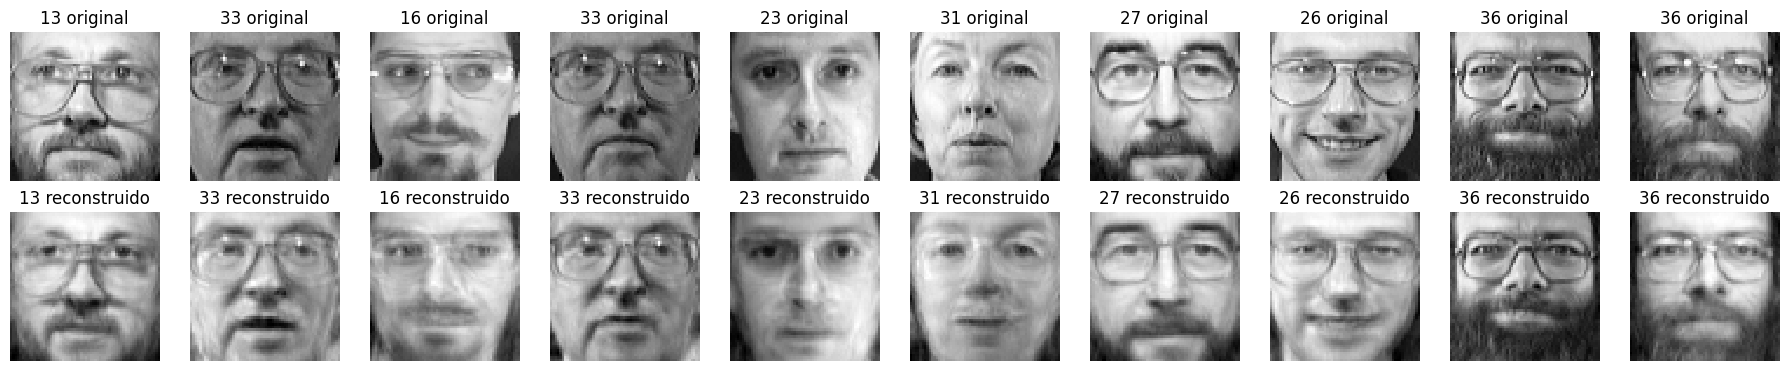

In [ ]:
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces;
from sklearn.model_selection import train_test_split

X, y = fetch_olivetti_faces(return_X_y=True); test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
K = 100; pca = PCA(n_components=K).fit(X_train)

Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test); ncols = 10
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} original")
    ax.imshow(X_test[i, :].reshape((64, 64)), cmap=plt.cm.gray, interpolation="none")
    ax = axs.flat[ncols + i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} reconstruido")
    ax.imshow(hX_test[i, :].reshape((64, 64)), cmap=plt.cm.gray, interpolation="none")

100 valore y la matriz de reconstrucción en las imágenes reconstruidas en cambio de las originales de 4k

**Ejercicio:** $\;$ escoge una tarea de clasificación de imágenes, por ejemplo digits o mnist_784 (id 554 de openml), estima un valor de $K$ razonable a partir del comportamiento del error de reconstrucción (empírico y poblacional) en función de $\,K\,$ y la visualización de eigenimages e imágenes reconstruidas

In [ ]:
# DIGITS:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True); test_size = 0.1

#MNIST:
from sklearn.datasets import fetch_openml
X, y = fetch_openml(data_id=554, return_X_y=True, as_frame=False);

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Clasificación de imagenes digits:**

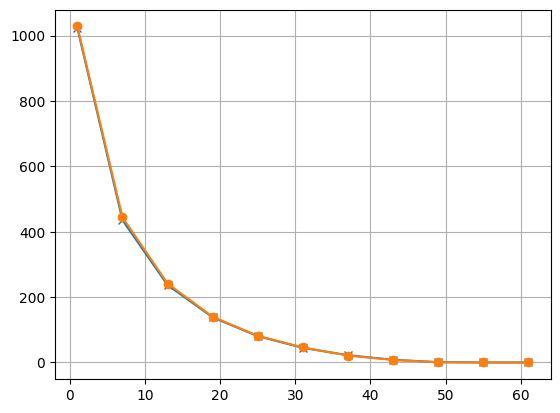

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True); test_size = 0.1

N=X.shape[0]
D=X.shape[1]

maxK=min(N,D)
Ks = range(1, maxK, maxK//10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
L_train = np.empty_like(Ks, dtype=float)
L_test = np.empty_like(Ks, dtype=float)

for i, K in enumerate(Ks):
    pca = PCA(n_components=K).fit(X_train)
    Z_train = pca.transform(X_train); hX_train = pca.inverse_transform(Z_train)
    L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()

    Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test)
    L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()
plt.grid(True); plt.plot(Ks, L_train, '-x', Ks, L_test, '-o');

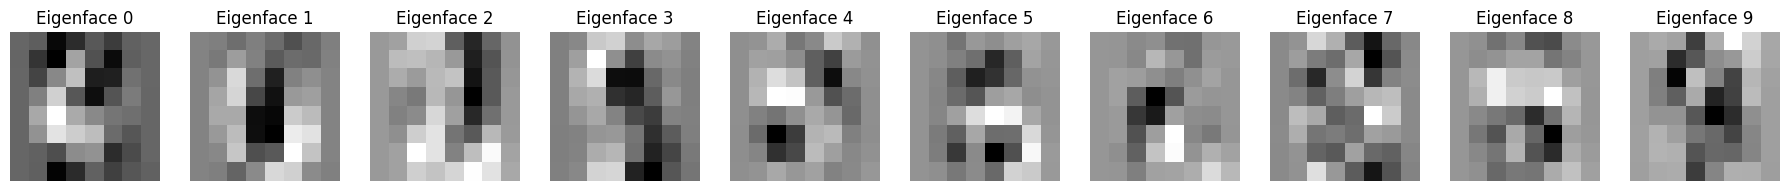

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True); test_size = 0.1

K = 10; pca = PCA(n_components=K).fit(X); nrows, ncols = 1, 10

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"Eigenface {i}")
    ax.imshow(pca.components_[i, :].reshape((8, 8)), cmap=plt.cm.gray, interpolation="none")

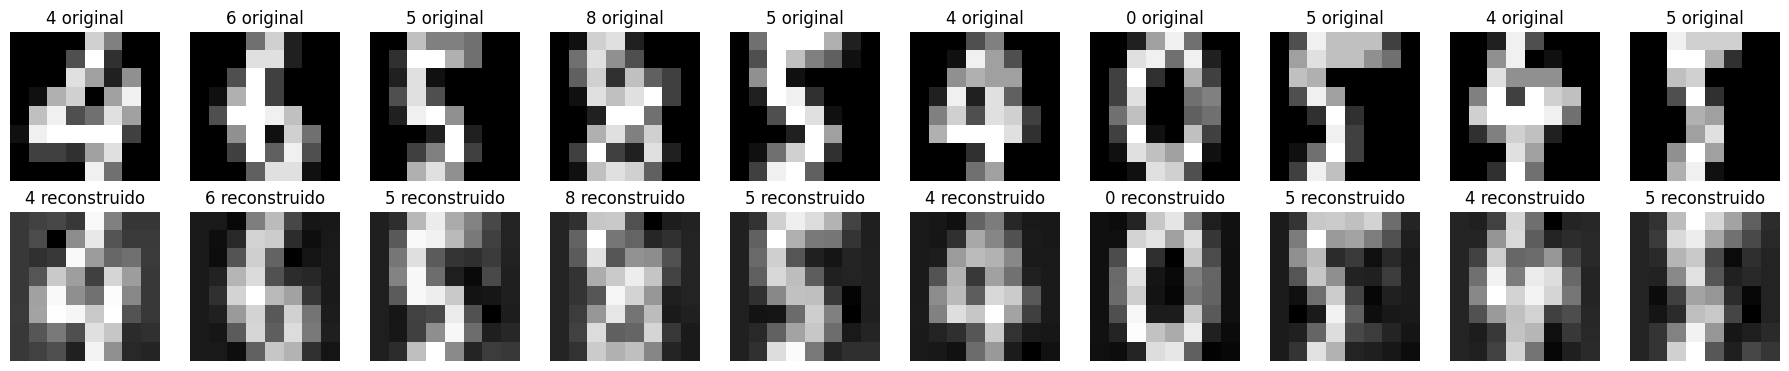

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True); test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
K = 19; pca = PCA(n_components=K).fit(X_train)

Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test); ncols = 10
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} original")
    ax.imshow(X_test[i, :].reshape((8, 8)), cmap=plt.cm.gray, interpolation="none")
    ax = axs.flat[ncols + i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} reconstruido")
    ax.imshow(hX_test[i, :].reshape((8, 8)), cmap=plt.cm.gray, interpolation="none")

**Clasificación de imagenes MNIST:**

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


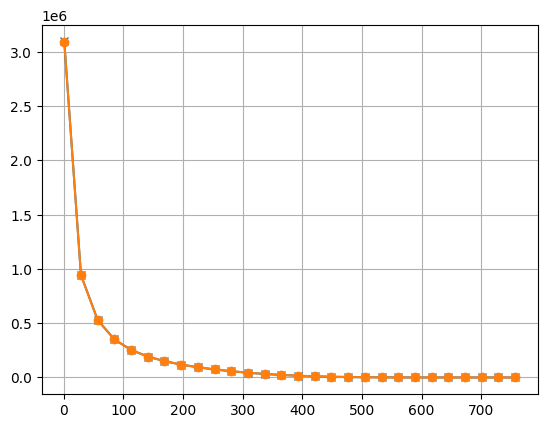

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X, y = fetch_openml(data_id=554, return_X_y=True, as_frame=False); test_size=0.1;

N=X.shape[0]
D=X.shape[1]

maxK=min(N,D)
Ks = range(1, maxK, np.round(np.sqrt(maxK)).astype(int))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
L_train = np.empty_like(Ks, dtype=float)
L_test = np.empty_like(Ks, dtype=float)

for i, K in enumerate(Ks):
    pca = PCA(n_components=K).fit(X_train)
    Z_train = pca.transform(X_train); hX_train = pca.inverse_transform(Z_train)
    L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()

    Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test)
    L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()
plt.grid(True); plt.plot(Ks, L_train, '-x', Ks, L_test, '-o');


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


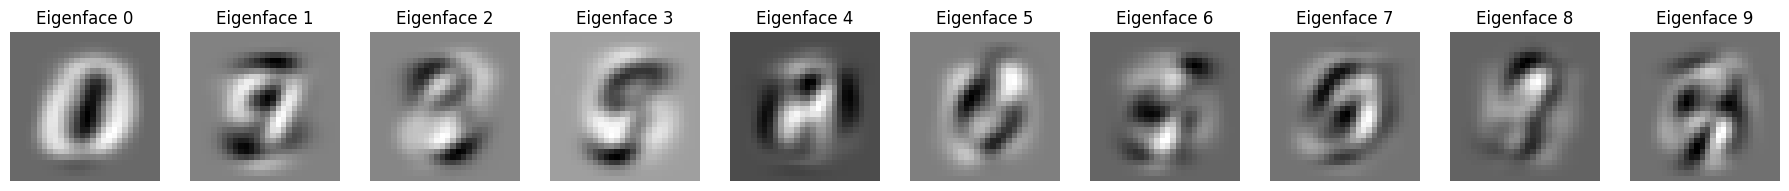

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
X, y = fetch_openml(data_id=554, return_X_y=True, as_frame=False);test_size=0.1;

K = 10; pca = PCA(n_components=K).fit(X); nrows, ncols = 1, 10

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"Eigenface {i}")
    ax.imshow(pca.components_[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")

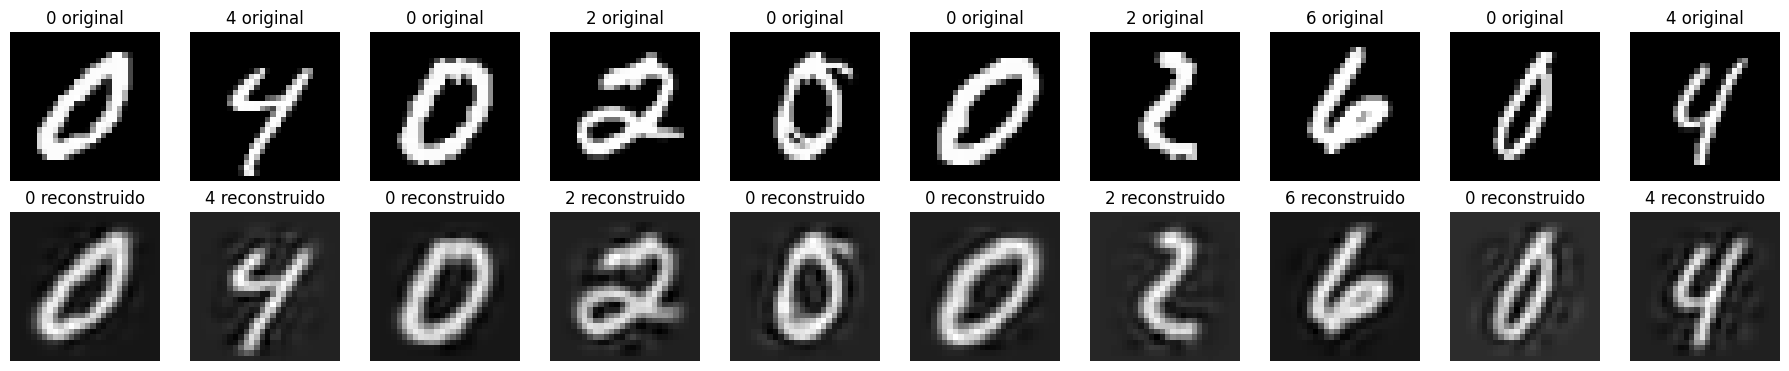

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X, y = fetch_openml(data_id=554, return_X_y=True, as_frame=False);test_size=0.1;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
K = 102; pca = PCA(n_components=K).fit(X_train)

Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test); ncols = 10
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} original")
    ax.imshow(X_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")
    ax = axs.flat[ncols + i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} reconstruido")
    ax.imshow(hX_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")